In [9]:
import numpy as np
import pandas as pd
import scanpy as sc
from scipy.stats import *
import os
from matplotlib import pyplot as plt
import seaborn as sns
from copy import copy

In [10]:
ppath = '/stanley/WangLab/Connie/02.TEMPOmap/03.revision1000Gene'
adata = sc.read_h5ad(os.path.join(ppath, 'adata', '2022-10-21-TEMPOrevision1000Gene-filtered.h5ad'))
sample_list = np.unique(adata.obs['sample'])
n_samples = len(sample_list)

In [11]:
sample_list

array(['1h_labeling', '1h_labeling_1h_wash', '1h_labeling_2h_wash',
       '1h_labeling_4h_wash', '1h_labeling_6h_wash', '20h_labeling',
       'STARmap'], dtype=object)

In [12]:
# anchor genes
_anchor = pd.read_csv(os.path.join(ppath, '1000-gene HeLa dataset anchor gene.csv'))
anchor = _anchor['Anchor gene'].values

In [13]:
sample_adata = dict()
for sample in sample_list:
    _adata = sc.read_h5ad(os.path.join(ppath, 'adata', f'TEMPO-1000gene-flt-{sample}.h5ad'))
    sample_adata[sample] = _adata

In [14]:
sample_adata['1h_labeling'].layers['anchor_normalized_expr'].shape

(2090, 998)

In [15]:
avg_20h = np.mean(sample_adata['20h_labeling'].layers['anchor_normalized_expr'], axis=0)
avg_star = np.mean(sample_adata['STARmap'].layers['anchor_normalized_expr'], axis=0)
avg_1h = np.mean(sample_adata['1h_labeling'].layers['anchor_normalized_expr'], axis=0)

In [16]:
# detection efficiency
detec_effi = avg_20h / avg_star
detec_effi = avg_20h / avg_star
detec_effi = detec_effi[np.isin(adata.var.index, anchor, invert=True)]

Text(0.5, 1.0, 'detection efficiency')

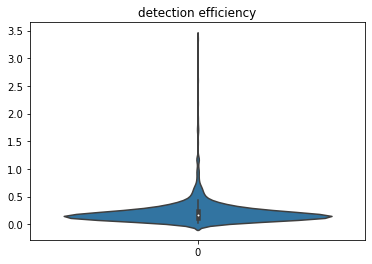

In [17]:
sns.violinplot(data=detec_effi).set_title('detection efficiency')

Text(0.5, 1.0, 'labeling efficiency')

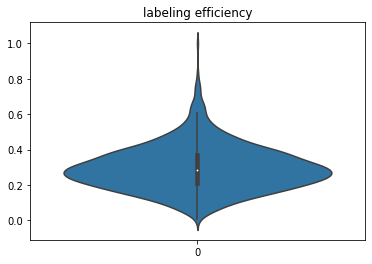

In [18]:
# labeling efficiency
label_effi = avg_1h / avg_20h
label_effi = label_effi[np.isin(adata.var.index, anchor, invert=True)]
sns.violinplot(data=label_effi).set_title('labeling efficiency')

In [22]:
avg_star_ = avg_star[np.isin(adata.var.index, anchor, invert=True)]

/home/unix/wangk/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'detection efficiency')

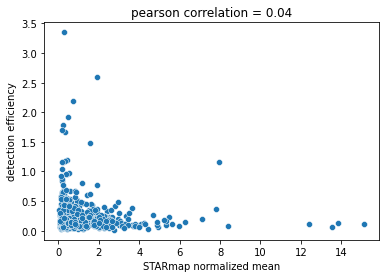

In [27]:
# correlation STARmap - detection efficiency
sns.scatterplot(avg_star_, detec_effi).set_title(f'pearson correlation = {pearsonr(avg_star_, detec_effi)[1]:.2f}')
plt.xlabel('STARmap normalized mean')
plt.ylabel('detection efficiency')

/home/unix/wangk/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'labeling efficiency')

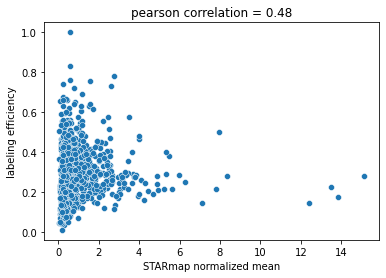

In [28]:
sns.scatterplot(avg_star_, label_effi).set_title(f'pearson correlation = {pearsonr(avg_star_, label_effi)[1]:.2f}')
plt.xlabel('STARmap normalized mean')
plt.ylabel('labeling efficiency')